## COMPTE RENDU TP3 Machine Learning

In [1]:
import warnings
warnings.filterwarnings("ignore") 

import numpy as np
import pandas as pd

#import sys
#!{sys.executable} -m pip install keras

import nltk    #Natural language processing tool-kit
nltk.download('stopwords')

from nltk.corpus import stopwords                   #Stopwords corpus
from keras.datasets import imdb

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Samuel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Using TensorFlow backend.


In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

In [3]:
from keras.datasets import imdb

## Jeu de données complet

In [4]:
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

names = ["Naive Bayes", "LDA", "QDA"]
classifiers = [
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

Dataset of 25,000 movies reviews from IMDB, labeled by sentiment (positive/negative). Reviews have been preprocessed, and each review is encoded as a sequence of word indexes (integers). For convenience, words are indexed by overall frequency in the dataset, so that for instance the integer "3" encodes the 3rd most frequent word in the data. This allows for quick filtering operations such as: "only consider the top 10,000 most common words, but eliminate the top 20 most common words".

In [5]:
(X_train, y_train), (X_test, y_test) = imdb.load_data()

In [12]:
X_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1

# Le texte a été hashé

In [32]:
X_train[0:100]

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1

Les mots sont encodés en nombre

# On va essayer de reconstruire le texte à partir de la partie hashé

In [8]:
def getKeysByValue(dictOfElements, valueToFind):
    listOfKeys = list()
    listOfItems = dictOfElements.items()
    for item  in listOfItems:
        if item[1] == valueToFind:
            listOfKeys.append(item[0])
    print(listOfKeys)

In [18]:
for word_num in X_train[100]:
    getKeysByValue(imdb.get_word_index(),word_num)

['the']
['was']
['rather']
['is']
['him']
['completely']
['br']
['english']
['send']
['to']
['one']
['dvd']
['for']
['kind']
['way']
['are']
['year']
['type']
['but']
['tired']
['talent']
['of']
['am']
['stories']
['slightest']
['coop']
['on']
['her']
['no']
['was']
['although']
['some']
['has']
['as']
['was']
['garbage']
["che's"]
['that']
['to']
['to']
['when']
['it']
['as']
['if']
['is']
['herself']
['br']
['bloodsuckers']
['door']
['simply']
['to']
['picture']
['25']
['for']
['he']
['silent']
['to']
['holy']
['dramatically']
['to']
['bigger']
['reason']
['was']
['then']
['does']
['sorry']
['very']
['not']
['reason']
['as']
['it']
['out']
['is']
['herself']
['br']
["film's"]
['for']
['with']
["creators'"]
['are']
['of']
['tension']
['4']
['of']
['human']
['br']
['english']
['send']
['in']
['could']
['is']
['again']
['outrageous']
['movies']
['episode']
['we']
['could']
['that']
['elements']
['for']
['was']
['nothing']
['laugh']
['has']
['of']
['holy']
['laughing']
['lot']
['not']
['

In [10]:
from keras.datasets import imdb

In [19]:
imbd.get_word_index()
#Pour savoir à quel numéro correspond quel mot

NameError: name 'imbd' is not defined

On peut regarder les 50 mots les plus fréquents:

In [20]:
for word_num in np.arange(50):
    getKeysByValue(imdb.get_word_index(),word_num)

[]
['the']
['and']
['a']
['of']
['to']
['is']
['br']
['in']
['it']
['i']
['this']
['that']
['was']
['as']
['for']
['with']
['movie']
['but']
['film']
['on']
['not']
['you']
['are']
['his']
['have']
['he']
['be']
['one']
['all']
['at']
['by']
['an']
['they']
['who']
['so']
['from']
['like']
['her']
['or']
['just']
['about']
["it's"]
['out']
['has']
['if']
['some']
['there']
['what']
['good']


On va regarder si ils sont dans le stop word

In [33]:
frequents_word = [] #créer une liste si on veut un set: set()
for word_num in np.arange(50):
    frequents_word.append((imdb.get_word_index(),word_num))


In [47]:
frequents_word

[({'fawn': 34701,
   'tsukino': 52006,
   'nunnery': 52007,
   'sonja': 16816,
   'vani': 63951,
   'woods': 1408,
   'spiders': 16115,
   'hanging': 2345,
   'woody': 2289,
   'trawling': 52008,
   "hold's": 52009,
   'comically': 11307,
   'localized': 40830,
   'disobeying': 30568,
   "'royale": 52010,
   "harpo's": 40831,
   'canet': 52011,
   'aileen': 19313,
   'acurately': 52012,
   "diplomat's": 52013,
   'rickman': 25242,
   'arranged': 6746,
   'rumbustious': 52014,
   'familiarness': 52015,
   "spider'": 52016,
   'hahahah': 68804,
   "wood'": 52017,
   'transvestism': 40833,
   "hangin'": 34702,
   'bringing': 2338,
   'seamier': 40834,
   'wooded': 34703,
   'bravora': 52018,
   'grueling': 16817,
   'wooden': 1636,
   'wednesday': 16818,
   "'prix": 52019,
   'altagracia': 34704,
   'circuitry': 52020,
   'crotch': 11585,
   'busybody': 57766,
   "tart'n'tangy": 52021,
   'burgade': 14129,
   'thrace': 52023,
   "tom's": 11038,
   'snuggles': 52025,
   'francesco': 29114,

In [48]:
stop = set(stopwords.words('frequents_word')) 
print(stop)

OSError: No such file or directory: 'C:\\Users\\Samuel\\AppData\\Roaming\\nltk_data\\corpora\\stopwords\\frequents_word'

On va essayé d'utiliser les algorithmes du cours pour voir quel algorithme a la meilleur prédiction possible de notre texte.

## Naive Baye, LDA et QDA

In [39]:
names = ["Naive Bayes", "LDA", "QDA"]
classifiers = [ GaussianNB(), LinearDiscriminantAnalysis(),QuadraticDiscriminantAnalysis()]

In [40]:
for name, clf in zip(names, classifiers):
    clf_fit = clf.fit(X=X_train, y=y_train)
    print("Le score sur le train avec la méthode", name , "est %.3f" % accuracy_score(clf_fit.predict(X_train),y_train),".")
    print("Le score sur le test avec la méthode", name , "est %.3f" % accuracy_score(clf_fit.predict(X_test),y_test),".")

ValueError: setting an array element with a sequence.

## KNN

In [42]:
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

ValueError: setting an array element with a sequence.

In [44]:
errors = []
for k in range(1,50):
    knn = neighbors.KNeighborsClassifier(k)
    errors.append(100*(knn.fit(X_train, y_train).score(X_test, y_test)))
plt.plot(range(1,50), errors,'--o')
plt.show()

ValueError: setting an array element with a sequence.

In [43]:
error = 1 - knn.score(X_test, y_test)
print('Erreur: %f' % error)

ValueError: setting an array element with a sequence.

In [45]:
acc_train = []
acc_test = []
for k in np.arange(1,50):
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn_fit = knn.fit(X=X_train,y=y_train)
    acc_train.append(accuracy_score(knn_fit.predict(X_train),y_train))
    acc_test.append(accuracy_score(knn_fit.predict(X_test),y_test))

ValueError: setting an array element with a sequence.

ValueError: x and y must have same first dimension, but have shapes (49,) and (0,)

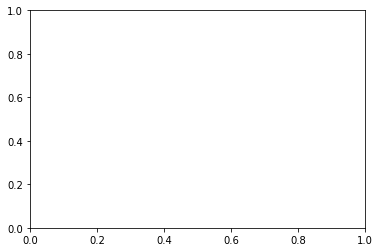

In [46]:
plt.plot(np.arange(1,50),acc_train,label="Accuracy on train",color='red')
plt.plot(np.arange(1,50),acc_test,label="Accuracy on test",color='blue')
plt.axvline(np.arange(1,50)[k_hat],label="best k on test",color='yellow')
plt.legend()